## Sentiment Analysis

Use the newsapi to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
    1.Which coin had the highest mean positive score?
    2. Which coin had the highest negative score?
    3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shahriarshochi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
api_key =("34d0473c17c24afcb1997aad110bb7cc")

In [3]:
#Create a newsapi client

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")


In [5]:
# Fetch the Ethereum news articles

ethereum_articles = newsapi.get_everything(q='ethereum', language='en')


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,Miners voluntarily powered down as energy dema...,2022-07-12,0.1531,0.057,0.041,0.902
1,You gotta hand it to some people for being imp...,2022-07-25,0.5994,0.130,0.034,0.835
2,People in Russia will soon no longer be allowe...,2022-07-16,0.0516,0.088,0.057,0.855
3,"Three Arrows Capital, one of the crypto indust...",2022-06-29,-0.7579,0.000,0.169,0.831
4,Elon Musk-owned electric vehicle making compan...,2022-07-21,0.2023,0.053,0.000,0.947


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,"Less than two weeks into its soft launch, Game...",2022-07-23,-0.1531,0.000,0.045,0.955
1,Axie Infinity was the prime example of crypto ...,2022-07-06,0.2263,0.077,0.000,0.923
2,"The Ethereum Merge is significant, and not jus...",2022-07-25,0.2023,0.048,0.000,0.952
3,Ethereum and Bitcoin have nearly become househ...,2022-07-11,0.2500,0.065,0.000,0.935
4,"Whether you own cryptocurrency or not, the Eth...",2022-07-15,0.0000,0.000,0.000,1.000


In [8]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.020498,0.061810,0.054560,0.88360
std,0.441949,0.065289,0.067278,0.08115
min,-0.862500,0.000000,0.000000,0.64100
25%,-0.296000,0.000000,0.000000,0.83100
50%,0.000000,0.059500,0.000000,0.89050
75%,0.361200,0.093750,0.092250,0.93725
max,0.888500,0.271000,0.249000,1.00000


In [9]:
# Describe the Ethereum Sentiment

ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.148119,0.077230,0.045380,0.877360
std,0.447397,0.071638,0.068501,0.089522
min,-0.936600,0.000000,0.000000,0.633000
25%,-0.057025,0.000000,0.000000,0.826500
50%,0.220350,0.069500,0.000000,0.896000
75%,0.458800,0.116250,0.082000,0.935250
max,0.921600,0.299000,0.354000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score

### Natural Language Processing

### Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

    1. Lowercase each word.
    2. Remove Punctuation.
    3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
#Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
#Create a list of stopwords
sw = set(stopwords.words('english'))

In [12]:
#Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    #Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('',text)
    
    #Create a tokenized list of the words
    words = word_tokenize(text)
    
    #Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    #Convert the words to lowercase
    re_words = word_tokenize(re_clean)
    
    #Remove the stop words
    re_result = [word.lower() for word in re_words if word.lower() not in sw]
    
    return re_result

In [13]:
#create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Miners voluntarily powered down as energy dema...,2022-07-12,0.1531,0.057,0.041,0.902,"[miners, voluntarily, powered, energy, demand,..."
1,You gotta hand it to some people for being imp...,2022-07-25,0.5994,0.130,0.034,0.835,"[got, ta, hand, people, impetuous, even, face,..."
2,People in Russia will soon no longer be allowe...,2022-07-16,0.0516,0.088,0.057,0.855,"[people, russia, soon, longer, allowed, use, d..."
3,"Three Arrows Capital, one of the crypto indust...",2022-06-29,-0.7579,0.000,0.169,0.831,"[three, arrows, capital, one, crypto, industry..."
4,Elon Musk-owned electric vehicle making compan...,2022-07-21,0.2023,0.053,0.000,0.947,"[elon, muskowned, electric, vehicle, making, c..."


In [14]:
#Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"Less than two weeks into its soft launch, Game...",2022-07-23,-0.1531,0.000,0.045,0.955,"[less, two, weeks, soft, launch, gamestops, nf..."
1,Axie Infinity was the prime example of crypto ...,2022-07-06,0.2263,0.077,0.000,0.923,"[axie, infinity, prime, example, crypto, gamin..."
2,"The Ethereum Merge is significant, and not jus...",2022-07-25,0.2023,0.048,0.000,0.952,"[ethereum, merge, significant, people, crypto,..."
3,Ethereum and Bitcoin have nearly become househ...,2022-07-11,0.2500,0.065,0.000,0.935,"[ethereum, bitcoin, nearly, become, household,..."
4,"Whether you own cryptocurrency or not, the Eth...",2022-07-15,0.0000,0.000,0.000,1.000,"[whether, cryptocurrency, ethereum, merge, big..."


### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin.

1. Use NLTK to produce the n-grams for N = 2
2. List the top 10 words for each coin.

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
#Generate the Bitcoin N-grams where N=2
bitcoin_a = tokenizer(bitcoin_df.text.str.cat())
bitcoin_counts = Counter(ngrams(bitcoin_a,n=2))
print(dict(bitcoin_counts))

{('miners', 'voluntarily'): 1, ('voluntarily', 'powered'): 1, ('powered', 'energy'): 1, ('energy', 'demand'): 1, ('demand', 'prices'): 1, ('prices', 'spiked'): 1, ('spiked', 'aerial'): 1, ('aerial', 'view'): 1, ('view', 'whinstone'): 1, ('whinstone', 'us'): 1, ('us', 'bitcoin'): 1, ('bitcoin', 'mining'): 2, ('mining', 'facility'): 1, ('facility', 'rockdale'): 1, ('rockdale', 'texas'): 1, ('texas', 'october'): 1, ('october', 'th'): 1, ('th', 'long'): 1, ('long', 'sheds'): 1, ('sheds', 'north'): 1, ('north', 'ameri'): 1, ('ameri', 'charsyou'): 1, ('charsyou', 'got'): 1, ('got', 'ta'): 1, ('ta', 'hand'): 1, ('hand', 'people'): 1, ('people', 'impetuous'): 1, ('impetuous', 'even'): 1, ('even', 'face'): 1, ('face', 'extraordinary'): 1, ('extraordinary', 'odds'): 1, ('odds', 'imagine'): 1, ('imagine', 'looking'): 1, ('looking', 'single'): 1, ('single', 'hard'): 1, ('hard', 'drive'): 3, ('drive', 'amidst'): 1, ('amidst', 'literal'): 1, ('literal', 'heap'): 1, ('heap', 'trash'): 1, ('trash', 'w

In [17]:
#Generate the ethereum N-grams where N=2
ethereum_a = tokenizer(ethereum_df.text.str.cat())
ethereum_counts= Counter(ngrams(ethereum_a,n=2))
print(dict(ethereum_counts))

{('less', 'two'): 1, ('two', 'weeks'): 1, ('weeks', 'soft'): 1, ('soft', 'launch'): 1, ('launch', 'gamestops'): 1, ('gamestops', 'nft'): 1, ('nft', 'marketplace'): 8, ('marketplace', 'already'): 1, ('already', 'courting'): 1, ('courting', 'controversy'): 1, ('controversy', 'among'): 1, ('among', 'nfts'): 1, ('nfts', 'listed'): 1, ('listed', 'platform'): 1, ('platform', 'artwork'): 1, ('artwork', 'called'): 1, ('called', 'falling'): 3, ('falling', 'man'): 3, ('man', 'spotted'): 1, ('spotted', 'web'): 1, ('web', 'charsaxie'): 1, ('charsaxie', 'infinity'): 1, ('infinity', 'prime'): 1, ('prime', 'example'): 1, ('example', 'crypto'): 1, ('crypto', 'gaming'): 1, ('gaming', 'last'): 1, ('last', 'year'): 4, ('year', 'playtoearn'): 1, ('playtoearn', 'formula'): 1, ('formula', 'helped'): 1, ('helped', 'reach'): 1, ('reach', 'million'): 1, ('million', 'daily'): 1, ('daily', 'active'): 1, ('active', 'users'): 1, ('users', 'last'): 1, ('last', 'november'): 1, ('november', 'came'): 1, ('came', 'cras

In [18]:
#Function token_count generates the top 10 words for a given coin
def token_count(tokens,N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
#Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = token_count(bitcoin_a,10)
bitcoin_top_10

[('bitcoin', 41),
 ('crypto', 29),
 ('cryptocurrency', 24),
 ('reuters', 24),
 ('said', 14),
 ('digital', 13),
 ('july', 11),
 ('money', 11),
 ('us', 9),
 ('wednesday', 9)]

In [20]:
#Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = token_count(ethereum_a,10)
ethereum_top_10

[('crypto', 32),
 ('market', 19),
 ('cryptocurrency', 18),
 ('ethereum', 17),
 ('nft', 16),
 ('charsthe', 14),
 ('investors', 14),
 ('charswhat', 14),
 ('last', 12),
 ('one', 12)]

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize']=[20.0,10.0]

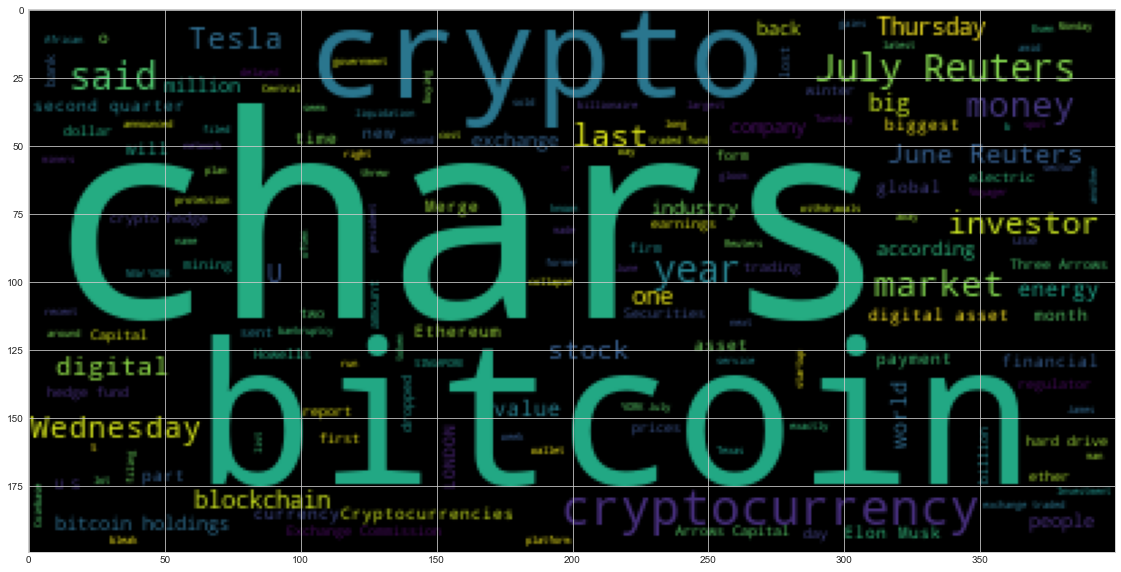

In [22]:
#Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc)

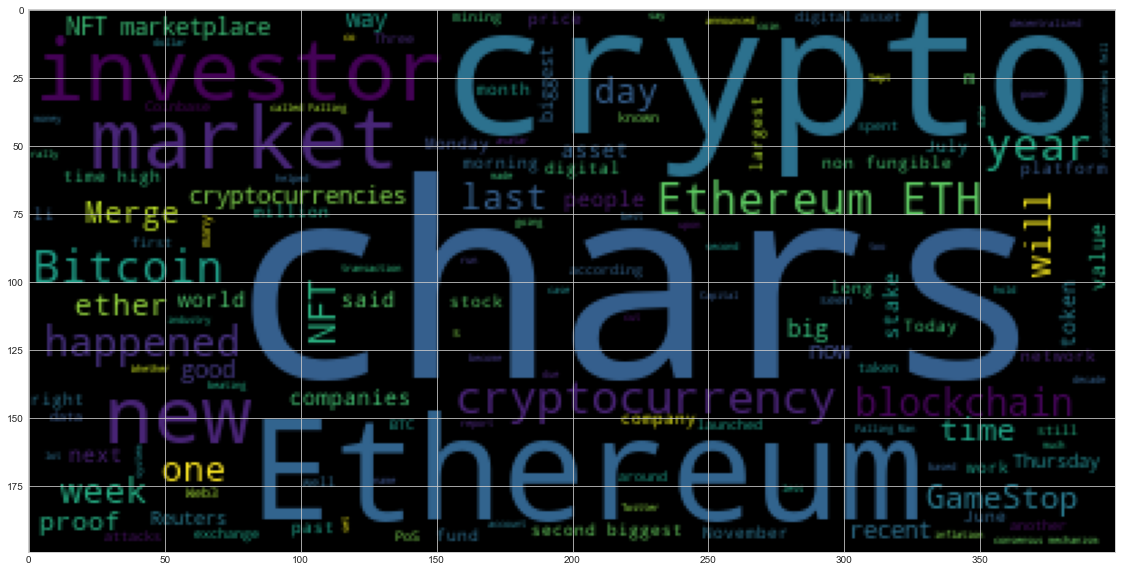

In [23]:
#Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(wc)

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
#Download the language model for spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 4.0 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
#Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
#Concentrate all the Bitcoin text together
concat_bitcoin = bitcoin_df.text.str.cat()
concat_bitcoin

'Miners voluntarily powered down as energy demand and prices spiked \r\nAn aerial view of the Whinstone US Bitcoin mining facility in Rockdale, Texas, on October 9th, 2021. The long sheds at North Ameri… [+3770 chars]You gotta hand it to some people for being impetuous even in the face of extraordinary odds. Imagine looking for a single hard drive amidst a literal heap of trash. Well, thats been one UK mans goal … [+4091 chars]People in Russia will soon no longer be allowed to use digital assets as a form of payment. Russian president Vladimir Putin has signed a bill into law prohibiting the use of digital assets, such as … [+1436 chars]Three Arrows Capital, one of the crypto industrys biggest sinking ships, is finally being put out of its misery.\r\nOn Tuesday, the distressed crypto hedge fund was ordered into liquidation by a Virgin… [+2515 chars]Elon Musk-owned electric vehicle making company Tesla has sold a significant amount of its Bitcoin holdings, the firm said in a statement. 

In [28]:
#Run the NER processor on all of the text
bitcoin_doc = nlp(concat_bitcoin)
bitcoin_doc

#Add a title to the document
bitcoin_doc.user_data['Title'] = 'Bitcoin NER'

In [29]:
#Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [30]:
#list all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

the Whinstone US Bitcoin ORG
Rockdale GPE
Texas GPE
October 9th, 2021 DATE
North Ameri GPE
UK GPE
mans NORP
Russia GPE
Russian NORP
Vladimir Putin PERSON
Arrows Capital ORG
one CARDINAL
Tuesday DATE
Musk PERSON
Tesla ORG
Bitcoin NORP
Q2 CARDINAL
Investments ORG
the Securities and Exchange Commission ORG
US GPE
ETF ORG
Just an hour TIME
SEC ORG
2021 DATE
Tesla ORG
$936 million MONEY
the second quarter of 2022 DATE
Bitcoin NORP
75 CARDINAL
2022 DATE
Wednesday DATE
$2.3 billion MONEY
second-quarter DATE
a record $3.3 billion MONEY
first ORDINAL
27 CARDINAL
Reuters ORG
chars]July 19 DATE
Reuters ORG
months DATE
chars]July 12 DATE
Reuters ORG
winter DATE
two CARDINAL
El Salvador GPE
Nayib Bukele PERSON
Bitcoin ORG
more than 50 percent PERCENT
this year DATE
chars]NEW YORK GPE
July 20 DATE
Reuters ORG
Wednesday DATE
Tesla Inc ORG
TSLA.O ORG
about 75% PERCENT
fiat ORG
29 CARDINAL
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Wednesday DATE
Grayscale ORG
30 CARDINAL
Reuters ORG
6

### Ethereum NER

In [31]:
#Concatenate all of the Ethereum text together
concat_ethereum = ethereum_df.text.str.cat()
concat_ethereum

'Less than two weeks into its soft launch, GameStops NFT marketplace is already courting controversy. Among the NFTs listed on the platform is an artwork called Falling Man that was spotted by \r\nWeb3 … [+1429 chars]Axie Infinity was the prime example of crypto gaming last year, when its play-to-earn formula helped it reach up to 2.7 million daily active users last November. But that all came crashing down in Ma… [+1604 chars]The Ethereum Merge is significant, and not just for people who own crypto. In the works in one form or another since 2014, the long-delayed Merge will see the second biggest blockchain reduce its car… [+10658 chars]Ethereum and Bitcoin have nearly become household names. However, while they\'re often mentioned in tandem, they\'re far from the same.\xa0\r\nBitcoin was created as an alternative, decentralized currency. … [+9267 chars]Whether you own cryptocurrency or not, the Ethereum Merge is a big deal. In the works since 2014, the long-delayed Merge will see eth

In [32]:
#Run the NER processor on all of the text
ethereum_doc = nlp(concat_ethereum)
ethereum_doc

#Add a title to the document
ethereum_doc.user_data['Title'] = 'Ethereum NER'

In [33]:
#Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [34]:
#List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

Less than two weeks DATE
GameStops ORG
Falling Man PERSON
last year DATE
up to 2.7 million MONEY
daily DATE
last November DATE
chars]The Ethereum Merge PERSON
2014 DATE
Merge PERSON
second ORDINAL
the Ethereum Merge LAW
2014 DATE
Merge PERSON
second ORDINAL
Vitalik Buterin PERSON
Thursday DATE
the Ethereum Community Conference ORG
Paris GPE
4,800 MONEY
April DATE
Ethereum Merge ORG
the last month DATE
Ethereum 2.0 ORG
second ORDINAL
chars]DeFi GPE
the "wild west PRODUCT
the first six months of 2022 DATE
the first half of this DATE
Arrows Capital ORG
one CARDINAL
Tuesday DATE
28 CARDINAL
Reuters ORG
Ethereum ORG
Blockchain.com ORG
Kraken ORG
Coinbase PERSON
hundreds CARDINAL
chars]GameStop ORG
NFT ORG
Monday DATE
Ethereum ORG
Scaramucci PRODUCT
SkyBridge Capital ORG
one CARDINAL
Bloomberg GPE
Legion Strategies ORG
14 CARDINAL
Reuters ORG
NFT ORG
OpenSea ORG
Thursday DATE
about 20% PERCENT
30 CARDINAL
Reuters ORG
6.1% PERCENT
18,866.77 MONEY
GMT WORK_OF_ART
Thursday DATE
1,226.41 MONEY
6